In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')
import sys
import torch

sys.path.append("..")

from pepsflow.iPEPS_trainer import iPEPSTrainer
from pepsflow.models.observables import Observables

lambda_values = [lam for lam in np.arange(0.1, 4, 0.25)]

In [24]:
chi_values = [4, 8, 16]
for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=True)
    trainer.exe(lambda_values, epochs=5, use_prev=False, runs = 1, max_iter=10)
    trainer.save_data(fn = f"random_new/chi{chi}")

  6%|▋         | 1/16 [00:42<10:39, 42.66s/it]


KeyboardInterrupt: 

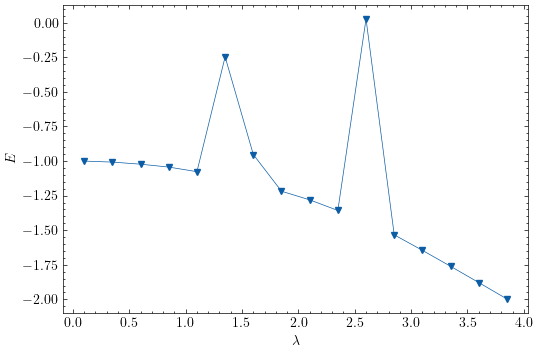

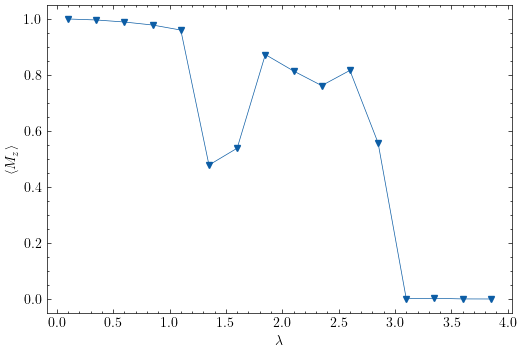

In [8]:
data = torch.load("data/random_new/chi8.pth", weights_only=False)
lamda_values = data.keys()
Mz, energies = [], []
for lam in lambda_values:
    E, C, T = data[lam].forward()
    A = data[lam].params[data[lam].map]
    energies.append(E.detach().cpu().numpy())
    Mz.append(abs(Observables.M(A, C, T)[2].detach().cpu().numpy()))

plt.figure(figsize=(6, 4))
plt.plot(lambda_values, energies, 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(lambda_values, Mz, 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\langle M_z \rangle$")
plt.show()

In [7]:
chi_values = [8, 16]
for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False, data_fn = "data/random_new/chi4.pth")
    trainer.exe(lambda_values, epochs=5, use_prev=False, runs = 1, max_iter=5,lr=0.01)
    trainer.save_data(fn = f"random_new/chi{chi}")

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Data saved to data\random_new/chi8.pth


100%|██████████| 16/16 [00:25<00:00,  1.62s/it]

Data saved to data\random_new/chi16.pth
